# How to download, read and visualize data from Sentinel 5-P TROPOMI sensor (Level 2)

## 1. Import the library

In [1]:
import sys
tool_directory = '/home/avilanov/Desktop/Personal/Others/ebytes/'
sys.path.append(tool_directory)
import ebytes as eb

## 2. Define product characteristics

In [2]:
mission = 'sentinel-5p'
path = tool_directory + 'data/'
processing_lev = 'L2'
parameter = 'NO2'
start_date = '2023-01-18'
end_date = '2023-01-18'
input_type = 'query'
lon_min = 0
lon_max = 4
lat_min = 40
lat_max = 43

## 3. Download data

In [3]:
TROPOMI_L2_eb_obj = eb.download_dataset(mission, path, processing_lev, parameter, start_date, end_date, 
                                        input_type=input_type, 
                                        lon_min=lon_min, lon_max=lon_max, lat_min=lat_min, lat_max=lat_max)

You can see all the results at https://s5phub.copernicus.eu/dhus/.
Number 0-S5P_NRTI_L2__NO2____20230118T124306_20230118T124806_27284_03_020400_20230118T132336
SELECTED
File name: 5a3c1f8c-e68a-4005-9c7e-4bf67a44499c
Product name: S5P_NRTI_L2__NO2____20230118T124306_20230118T124806_27284_03_020400_20230118T132336.nc
The file exists, it will not be downloaded again.
Dataset was successfully downloaded!


## 4. Read data

In [4]:
file = 'S5P_NRTI_L2__NO2____20230118T124306_20230118T124806_27284_03_020400_20230118T132336.nc'
date = '2023-01-18'

In [5]:
data = TROPOMI_L2_eb_obj.read(file, date)
data

<xarray.Dataset>
Dimensions:                                               (scanline: 372, ground_pixel: 450, time: 1, corner: 4, polynomial_exponents: 6, intensity_offset_polynomial_exponents: 1, layer: 34, vertices: 2)
Coordinates:
  * scanline                                              (scanline) float64 ...
  * ground_pixel                                          (ground_pixel) float64 ...
  * time                                                  (time) datetime64[ns] ...
  * corner                                                (corner) float64 0....
  * polynomial_exponents                                  (polynomial_exponents) float64 ...
  * intensity_offset_polynomial_exponents                 (intensity_offset_polynomial_exponents) float64 ...
  * layer                                                 (layer) float64 0.0...
  * vertices                                              (vertices) float64 ...
    latitude                                              (time, scanline, ground_pixel) float32 ...
    longitude                                             (time, scanline, ground_pixel) float32 ...
Data variables:
    delta_time                                            (time, scanline) datetime64[ns] ...
    time_utc                                              (time, scanline) object ...
    qa_value                                              (time, scanline, ground_pixel) float32 ...
    nitrogendioxide_tropospheric_column                   (time, scanline, ground_pixel) float32 ...
    nitrogendioxide_tropospheric_column_precision         (time, scanline, ground_pixel) float32 ...
    nitrogendioxide_tropospheric_column_precision_kernel  (time, scanline, ground_pixel) float32 ...
    averaging_kernel                                      (time, scanline, ground_pixel, layer) float32 ...
    air_mass_factor_troposphere                           (time, scanline, ground_pixel) float32 ...
    air_mass_factor_total                                 (time, scanline, ground_pixel) float32 ...
    tm5_tropopause_layer_index                            (time, scanline, ground_pixel) float64 ...
    tm5_constant_a                                        (layer, vertices) float32 ...
    tm5_constant_b                                        (layer, vertices) float32 ...

In [6]:
data_array = data.nitrogendioxide_tropospheric_column.isel(time=0)
data_array

<xarray.DataArray 'nitrogendioxide_tropospheric_column' (scanline: 372, ground_pixel: 450)>
[167400 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 3.0 ... 368.0 369.0 370.0 371.0
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2023-01-18
    latitude      (scanline, ground_pixel) float32 ...
    longitude     (scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Tropospheric verti...
    ancillary_variables:                                   nitrogendioxide_tr...
    multiplication_factor_to_convert_to_molecules_percm2:  6.02214e+19

In [7]:
longitude_array = data.longitude.isel(time=0)
longitude_array

<xarray.DataArray 'longitude' (scanline: 372, ground_pixel: 450)>
[167400 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 3.0 ... 368.0 369.0 370.0 371.0
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2023-01-18
    latitude      (scanline, ground_pixel) float32 ...
    longitude     (scanline, ground_pixel) float32 ...
Attributes:
    long_name:      pixel center longitude
    units:          degrees_east
    standard_name:  longitude
    valid_min:      -180.0
    valid_max:      180.0
    bounds:         /PRODUCT/SUPPORT_DATA/GEOLOCATIONS/longitude_bounds

In [8]:
latitude_array = data.latitude.isel(time=0)
latitude_array

<xarray.DataArray 'latitude' (scanline: 372, ground_pixel: 450)>
[167400 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 3.0 ... 368.0 369.0 370.0 371.0
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2023-01-18
    latitude      (scanline, ground_pixel) float32 ...
    longitude     (scanline, ground_pixel) float32 ...
Attributes:
    long_name:      pixel center latitude
    units:          degrees_north
    standard_name:  latitude
    valid_min:      -90.0
    valid_max:      90.0
    bounds:         /PRODUCT/SUPPORT_DATA/GEOLOCATIONS/latitude_bounds

## 5. Visualize data

In [9]:
fig_title = 'Nitrogen dioxide over Europe on January 18, 2023'
units = data.nitrogendioxide_tropospheric_column.units

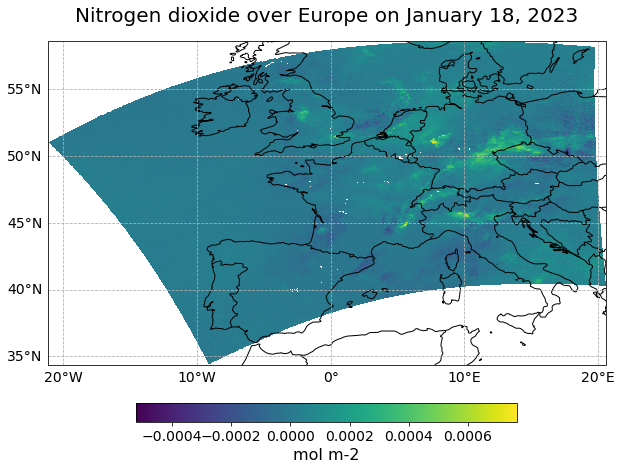

In [10]:
TROPOMI_L2_eb_obj.visualize(data_array, 
                            latitude_array, 
                            longitude_array, 
                            units, fig_title, 
                            fig_size=(15, 7))